In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt      
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('hour.csv')

In [3]:
data.drop(['instant','dteday'],axis=1,inplace=True)

In [4]:
z = data.drop('workingday', axis=1)
t = data['workingday']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(z, t, test_size = 0.20, random_state = 130)

# Kmean

In [6]:
kmeans = KMeans(n_clusters=5).fit(x_train, y_train)
kpred = kmeans.predict(x_test)

----------------------Classification Report----------------------

              precision    recall  f1-score   support

           0       0.27      0.25      0.26      1041
           1       0.99      0.04      0.07      2435
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.10      3476
   macro avg       0.25      0.06      0.07      3476
weighted avg       0.77      0.10      0.13      3476

----------------------Confusion Matrix---------------------------



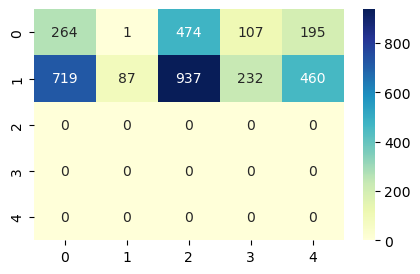

KMean score test_train -1751710803.2590427 -7203363969.00057


In [7]:
Ktrain = kmeans.score(x_train, y_train)*100
Ktest = kmeans.score(x_test, y_test)*100
Kconf = confusion_matrix(y_test,kpred)
print("----------------------Classification Report----------------------\n")
print(classification_report(y_test,kpred))
print("----------------------Confusion Matrix---------------------------\n")
plt.figure(figsize=(5,3))
sns.heatmap(Kconf, annot=True,cmap="YlGnBu",fmt='g')
plt.show()
print('KMean score test_train', Ktest, Ktrain)

# SVM

In [8]:
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)
svmpred = svm.predict(x_test)

----------------------Classification Report----------------------

              precision    recall  f1-score   support

           0       0.89      0.36      0.51      1041
           1       0.78      0.98      0.87      2435

    accuracy                           0.80      3476
   macro avg       0.84      0.67      0.69      3476
weighted avg       0.81      0.80      0.76      3476

----------------------Confusion Matrix---------------------------



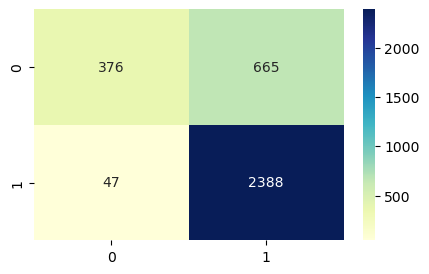

Support Vector Machine 79.51668584579977 78.0479033302165


In [9]:
svmtrain = svm.score(x_train, y_train)*100
svmtest = svm.score(x_test, y_test)*100
svmconf = confusion_matrix(y_test,svmpred)
print("----------------------Classification Report----------------------\n")
print(classification_report(y_test,svmpred))
print("----------------------Confusion Matrix---------------------------\n")
plt.figure(figsize=(5,3))
sns.heatmap(svmconf, annot=True,cmap="YlGnBu",fmt='g')
plt.show()
print('Support Vector Machine', svmtest, svmtrain)